## Generatate Zipf distributed data

Based on https://arxiv.org/abs/1310.0448:
* David J. Schwab, Ilya Nemenman, Pankaj Mehta: _Zipf's law and criticality in multivariate data without fine-tuning_

In [1]:
%pylab inline
style.use('ggplot')
from numba import jit, vectorize, float64, int32

Populating the interactive namespace from numpy and matplotlib


### Parameter values

In [2]:
N = 26        # number of spins (bits) 
C = 2**(N-4)  # number of draws
h = randn(N)  # local magnetic field at each bit ($h_i$ in the paper)

### Pack bit vector into an integer for efficient frequency counting.

In [3]:
@jit(nopython=True)
def pack(xs):
    r = 0
    for x in xs:
        r <<= 1
        r |= x
    return r

### Sample spins at a given inverse temperature.

In [4]:
@vectorize([int32(float64)])
def sample(beta):
    H=h*beta
    p = exp(H)/(2*cosh(H))
    return pack(rand(N) < p)

### Sample spins at random inverse temperatures and tally configuration frequencies.

In [5]:
%time d = bincount(sample(4*randn(C)))

CPU times: user 8.27 s, sys: 432 ms, total: 8.7 s
Wall time: 8.71 s


### Rank-frequency log-log plot.

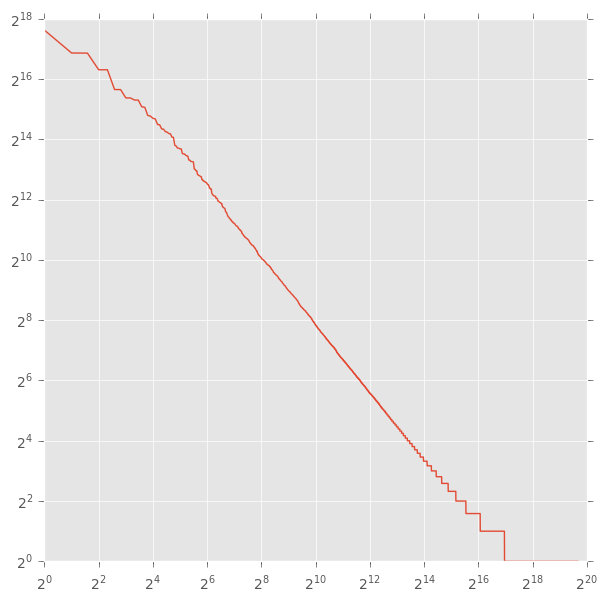

In [6]:
figure(figsize=(7,7))
loglog(sorted(d[d>0], reverse=True),basex=2,basey=2)